# ABOUT PROJECT
The goal of this project was to perform an exploratory data analysis (EDA) on a sales dataset obtained from Kaggle. The dataset consists of 51,290 records and 21 columns capturing various aspects of sales transactions. Through this analysis, we aim to gain insights into different aspects of our sales data, including sales trends, product performance, customer segmentation, and geographical analysis.The analysis for this project was conducted using both Python on Google Colab and Power BI.

# ABOUT DATASET
The goal of this project is to perform an exploratory data analysis (EDA) on a sales dataset obtained from Kaggle. The dataset consists of 51,290 records and 21 columns capturing various aspects of sales transactions. Through this analysis, we aim to gain insights into different aspects of our sales data, including sales trends, product performance, customer segmentation, and geographical analysis.


# IMPORTING LIBRARIES AND DATASET

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load data
df = pd.read_excel('superstore_sales.xlsx')
import warnings
warnings.filterwarnings("ignore")

# Data Exploration

In [ ]:
print(df.head())

          order_id order_date  ship_date       ship_mode    customer_name  \
0     AG-2011-2040 2011-01-01 2011-01-06  Standard Class  Toby Braunhardt   
1    IN-2011-47883 2011-01-01 2011-01-08  Standard Class      Joseph Holt   
2     HU-2011-1220 2011-01-01 2011-01-05    Second Class    Annie Thurman   
3  IT-2011-3647632 2011-01-01 2011-01-05    Second Class     Eugene Moren   
4    IN-2011-47883 2011-01-01 2011-01-08  Standard Class      Joseph Holt   

       segment            state    country  market   region  ...  \
0     Consumer      Constantine    Algeria  Africa   Africa  ...   
1     Consumer  New South Wales  Australia    APAC  Oceania  ...   
2     Consumer         Budapest    Hungary    EMEA     EMEA  ...   
3  Home Office        Stockholm     Sweden      EU    North  ...   
4     Consumer  New South Wales  Australia    APAC  Oceania  ...   

          category sub_category                 product_name    sales  \
0  Office Supplies      Storage          Tenex Lockers,

In [ ]:
print(df.shape)

(51290, 21)


In [ ]:
print(df.isnull().sum())

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64


# ANSWERING A FEW QUESTIONS USING THE DATASET

1. Top 10 bought products.

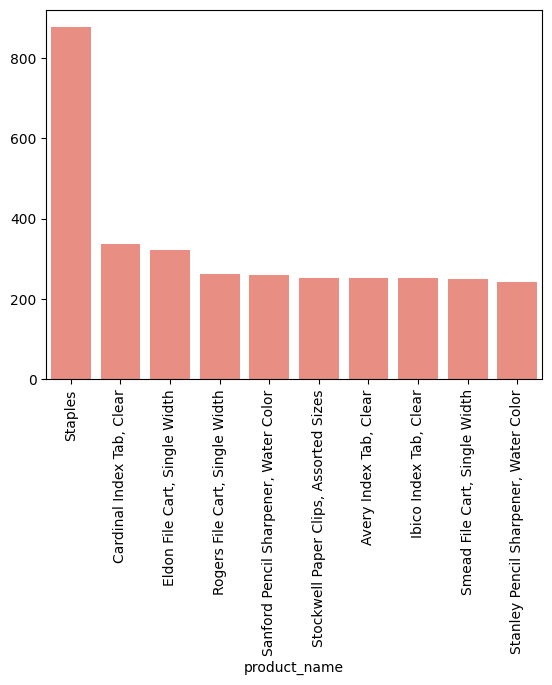

In [ ]:
boughts = df.groupby('product_name')['quantity'].sum().nlargest(10)
sns.barplot(x=boughts.index, y=boughts.values,color='salmon')
plt.xticks(rotation='vertical')
plt.show()

2. Top 10 products by sales

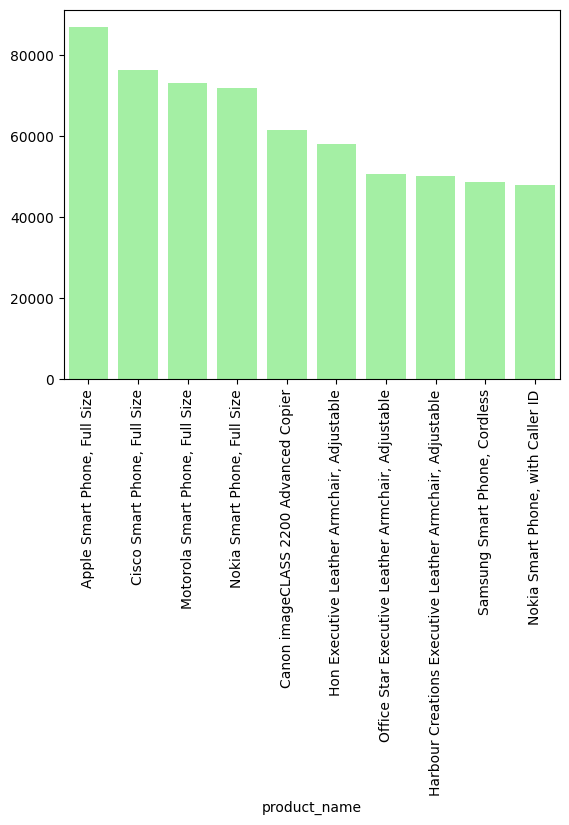

In [ ]:
product_sales = df.groupby('product_name')['sales'].sum().nlargest(10)
sns.barplot(x=product_sales.index, y=product_sales.values,color='palegreen')
plt.xticks(rotation='vertical')
plt.show()

3. Top 10 profitable products.

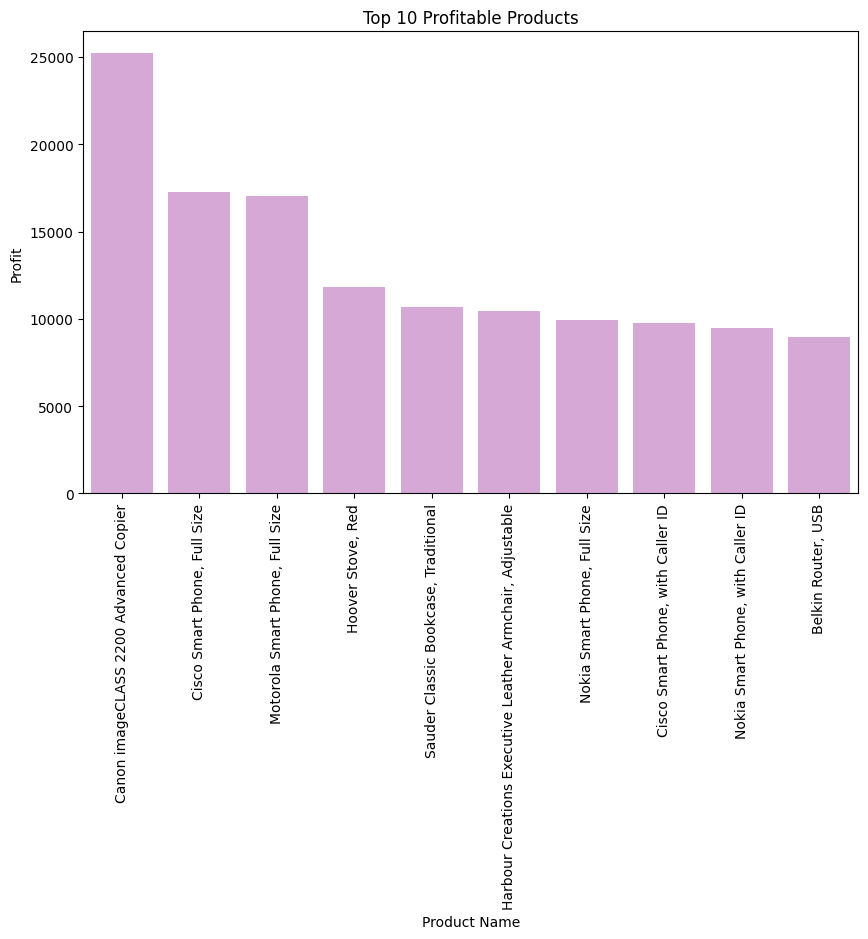

In [ ]:
profitable_products = df.groupby('product_name')['profit'].sum().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=profitable_products.index, y=profitable_products.values, color='plum')
plt.xticks(rotation='vertical')
plt.title('Top 10 Profitable Products')
plt.ylabel('Profit')
plt.xlabel('Product Name')
plt.show()

4. What are the Profitable categories?

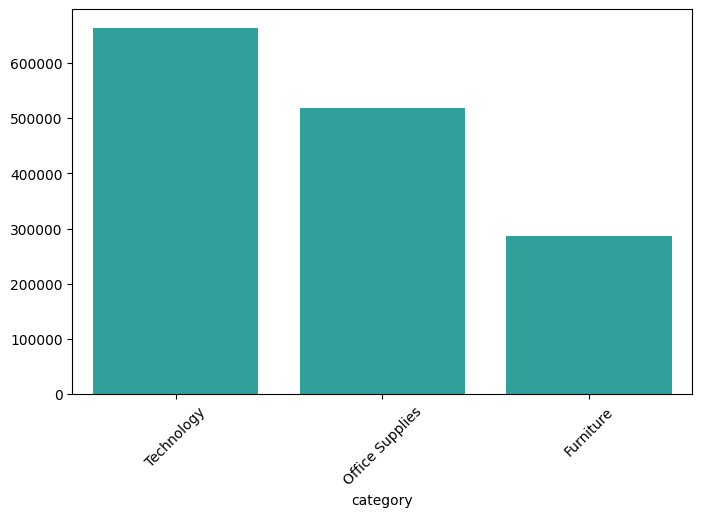

In [ ]:
profitable_category = df.groupby('category')['profit'].sum().nlargest(10)
plt.figure(figsize=(8, 5))
sns.barplot(x=profitable_category.index, y=profitable_category.values, color= 'lightseagreen')
plt.xticks(rotation=45)
plt.show()

5. Profitable segments.

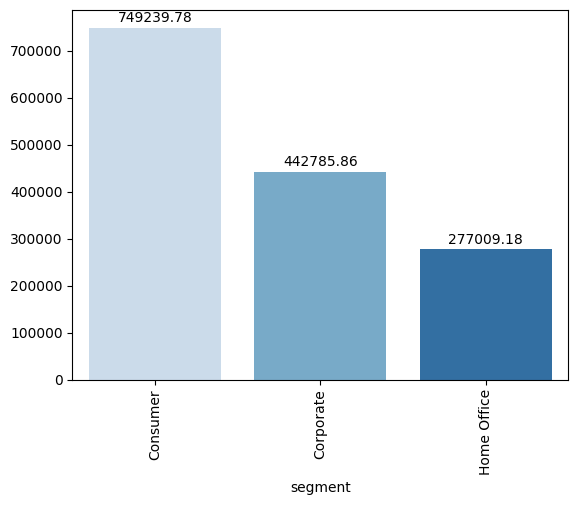

In [ ]:
profitable_segment = df.groupby('segment')['profit'].sum().nlargest(10)
ax = sns.barplot(x=profitable_segment.index, y=profitable_segment.values, palette='Blues')
plt.xticks(rotation='vertical')
# Add markers to the top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 7),
                   textcoords = 'offset points')
plt.show()


6. Sales by shipping mode.

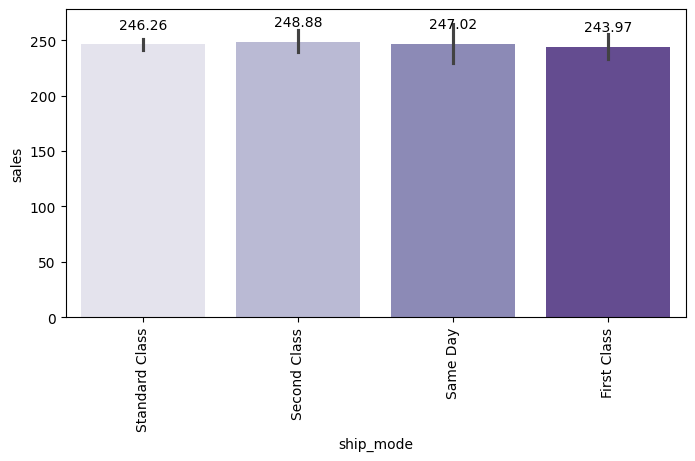

In [ ]:
plt.figure(figsize=(8, 4))
ax = sns.barplot(x='ship_mode', y='sales',data=df, palette='Purples')
plt.xticks(rotation='vertical')

# Add markers to the top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 14),
                   textcoords = 'offset points')

plt.show()

7. Sales by market.

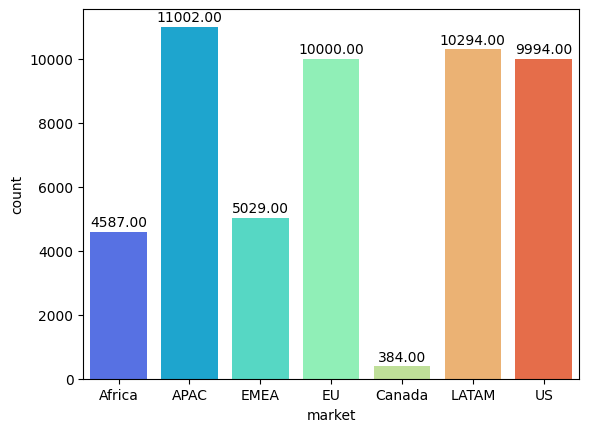

In [ ]:
ax = sns.countplot(x='market', data=df, palette='rainbow')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 7),
                   textcoords = 'offset points')
plt.show()

8. Top 10 countries by sales

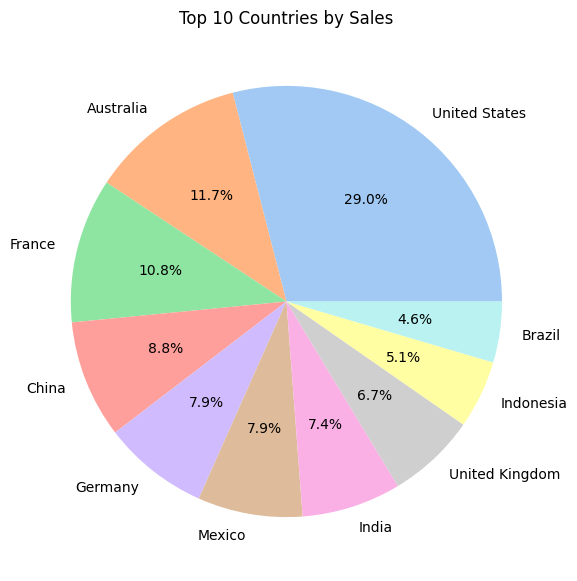

In [ ]:
pastel_colors = sns.color_palette("pastel")
top_countries_sales = df.groupby('country')['sales'].sum().nlargest(10)
plt.figure(figsize=(14, 7))
top_countries_sales.plot(kind='pie', autopct='%1.1f%%', colors=pastel_colors)
plt.title('Top 10 Countries by Sales')
plt.ylabel('')
plt.show()

9. Bottom 10 countries by sales

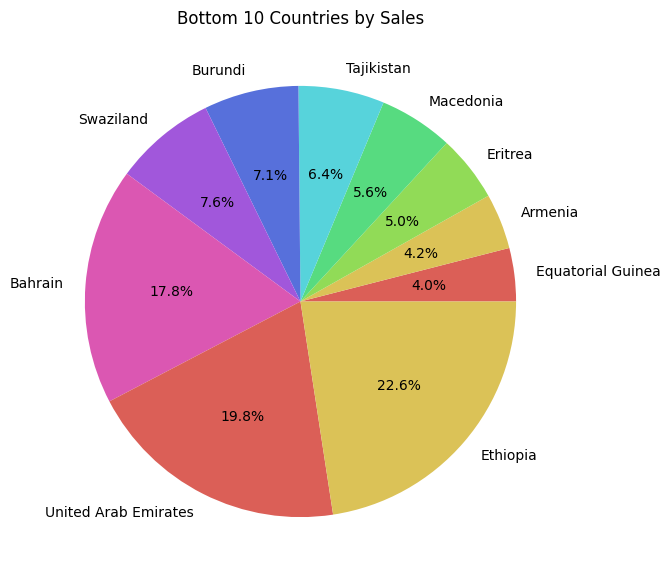

In [ ]:
custom_colors = sns.color_palette("hls", 8)
bottom_countries_sales = df.groupby('country')['sales'].sum().nsmallest(10)
plt.figure(figsize=(14, 7))
bottom_countries_sales.plot(kind='pie', autopct='%1.1f%%', colors=custom_colors)
plt.title('Bottom 10 Countries by Sales')
plt.ylabel('')
plt.show()

10. Average shipping cost by country

In [ ]:
df.groupby('country').agg({'shipping_cost':'mean'}).sort_values('shipping_cost', ascending=False).head(10)

,shipping_cost
country,
Taiwan,155.660714
Chad,148.970000
Lesotho,135.650000
Montenegro,93.937500
Slovenia,61.220000
Republic of the Congo,59.303333
Central African Republic,57.625714
Namibia,50.370000
Bangladesh,46.402883


11. Sales trend over the years

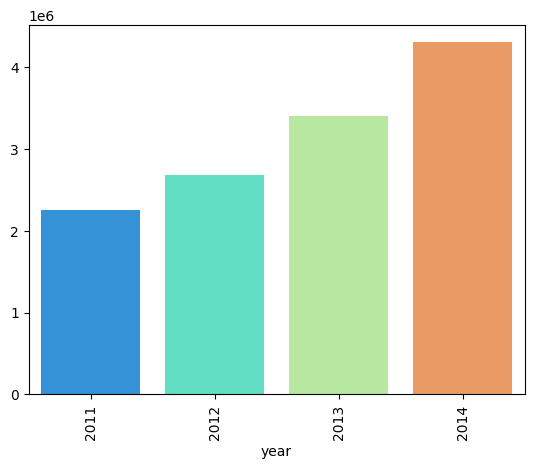

In [ ]:
sales_by_year = df.groupby('year')['sales'].sum()
sns.barplot(x=sales_by_year.index, y=sales_by_year.values, palette='rainbow')
plt.xticks(rotation='vertical')
plt.show()